In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./household_power_consumption.txt', sep=';',
                  parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'],index_col='dt')

/var/folders/wq/dl5c5pz97dd5x6t_hwxqwn240000gn/T/ipykernel_18264/3900550656.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('./household_power_consumption.txt', sep=';',
/var/folders/wq/dl5c5pz97dd5x6t_hwxqwn240000gn/T/ipykernel_18264/3900550656.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('./household_power_consumption.txt', sep=';',


In [3]:
df.shape

(2075259, 7)

In [4]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
# Check Missing Values
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
# điền vào hàng giá trị còn thiếu một cách khôn ngoan và thực hiện các thay đổi vĩnh viễn trong khung dữ liệu gốc 
df.ffill(axis=0,inplace=True)

In [7]:
df.isnull().sum().sum()

0

In [8]:
eq1 = (df['Global_active_power']*1000/60) 
eq2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
df['power_consumption'] = eq1 - eq2
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
dt,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


### Tạo thêm 2 cột từ index, Date và Time Column Separately

In [9]:
df['Date'] = df.index.date
df['time'] = df.index.time

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   power_consumption      float64       
 8   Date                   datetime64[ns]
 9   time                   object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 174.2+ MB


##### From 2006-12-16 to 2006-12-31 > 16 Days
##### From 2007-01-01 to 2007-12-31 > 365 Days
##### From 2008-01-01 to 2008-12-31 > 366 Days
##### From 2009-01-01 to 2009-12-31 > 365 Days
##### From 2010-01-01 to 2010-11-26 > 330 Days

##### Total Days: 1442 days

Vì chỉ có 16 dòng trong năm 2006, điều này có thể đánh lừa phân tích. 
Vì sẽ phân tích dữ liệu hàng năm và 16 bản ghi này sẽ không giúp hiểu được luồng dữ liệu trong năm 2006. 
Vậy nên ta xóa 16 bản ghi đó của năm 2006 và tiếp tục phân tích dữ liệu bốn năm còn lại. 


In [12]:
df = df[df.index.year>2006]

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Perform groupby and sum
df_data = numeric_df.groupby(df['Date']).sum()

In [14]:
df_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
Date,,,,,,,,
2007-01-01,2749.004,148.166,345785.73,11400.4,0.0,352.0,5880.0,39584.733333
2007-01-02,1269.236,190.342,348399.04,5348.2,0.0,348.0,6562.0,14243.933333
2007-01-03,1014.054,196.728,350722.21,4340.2,0.0,344.0,4765.0,11791.900000
2007-01-04,3259.412,202.302,345240.43,13648.6,1051.0,7597.0,10896.0,34779.533333
2007-01-05,2713.364,173.154,346313.90,11354.6,1483.0,379.0,7602.0,35758.733333


In [15]:
df_power_consumption = df_data[['power_consumption']]

In [16]:
df_power_consumption.head()

,power_consumption
Date,
2007-01-01,39584.733333
2007-01-02,14243.933333
2007-01-03,11791.900000
2007-01-04,34779.533333
2007-01-05,35758.733333


In [17]:
df_sub_meterings = df_data[['Sub_metering_1','Sub_metering_2','Sub_metering_3']]

In [18]:
df_sub_meterings.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,
2007-01-01,0.0,352.0,5880.0
2007-01-02,0.0,348.0,6562.0
2007-01-03,0.0,344.0,4765.0
2007-01-04,1051.0,7597.0,10896.0
2007-01-05,1483.0,379.0,7602.0


In [19]:
df_active_reactive = df_data[['Global_active_power','Global_reactive_power','Global_intensity']]

In [20]:
df_active_reactive.head()

,Global_active_power,Global_reactive_power,Global_intensity
Date,,,
2007-01-01,2749.004,148.166,11400.4
2007-01-02,1269.236,190.342,5348.2
2007-01-03,1014.054,196.728,4340.2
2007-01-04,3259.412,202.302,13648.6
2007-01-05,2713.364,173.154,11354.6


In [21]:
# Kiểm tra thống kê tổng hợp tiêu thụ điện năng hàng năm
df_power_consumption.groupby(df_power_consumption.index.year).describe()

power_consumption                                                       \
                 count          mean          std          min          25%   
Date                                                                          
2007             365.0  14316.716530  7141.760475  3969.333333  9122.500000   
2008             366.0  13635.700638  6200.780172  2313.633333  9383.325000   
2009             365.0  12728.079726  4731.511575  3804.100000  9443.333333   
2010             330.0  11980.816061  3963.001990  2064.000000  9201.950000   

                                                
               50%           75%           max  
Date                                            
2007  12678.133333  17471.766667  40280.600000  
2008  13211.400000  17616.600000  38598.966667  
2009  12650.666667  15607.100000  34344.000000  
2010  11767.733333  14607.150000  22103.766667

<Axes: title={'center': 'Yearly - Total watt-hour for Power Consumption'}, xlabel='Year', ylabel='Readings in watt-hour'>

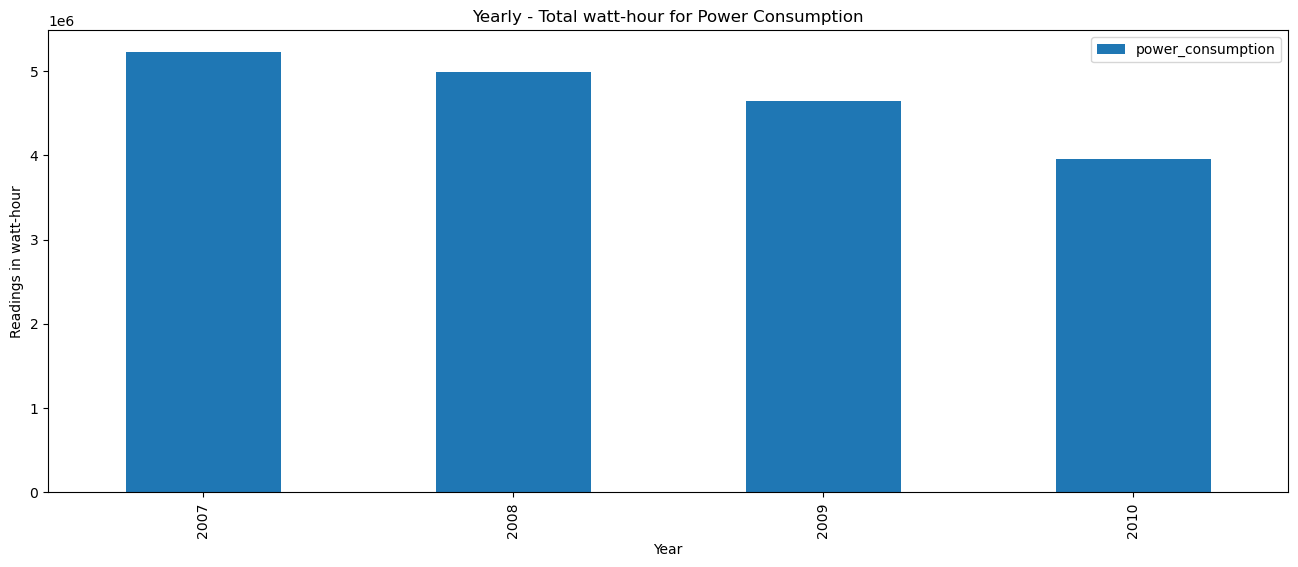

In [22]:
# Yearly - Total watt-hour for Power Consumption
df_power_consumption.groupby(df_power_consumption.index.year).sum().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Total watt-hour for Power Consumption", figsize=(16,6))

<Axes: title={'center': 'Yearly - Maximum watt-hour for Power Consumption'}, xlabel='Year', ylabel='Readings in watt-hour'>

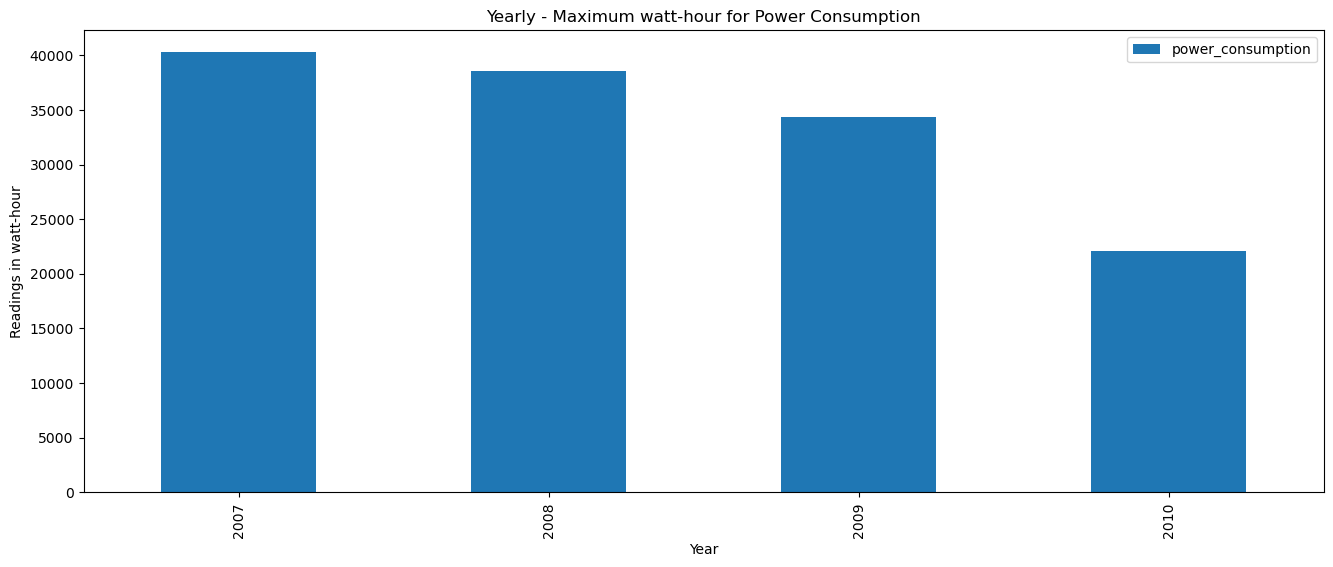

In [23]:
# Yearly - Maximum watt-hour for Power Consumption
df_power_consumption.groupby(df_power_consumption.index.year).max().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Maximum watt-hour for Power Consumption", figsize=(16,6))

<Axes: title={'center': 'Yearly - Minimum watt-hour for Power Consumption'}, xlabel='Year', ylabel='Readings in watt-hour'>

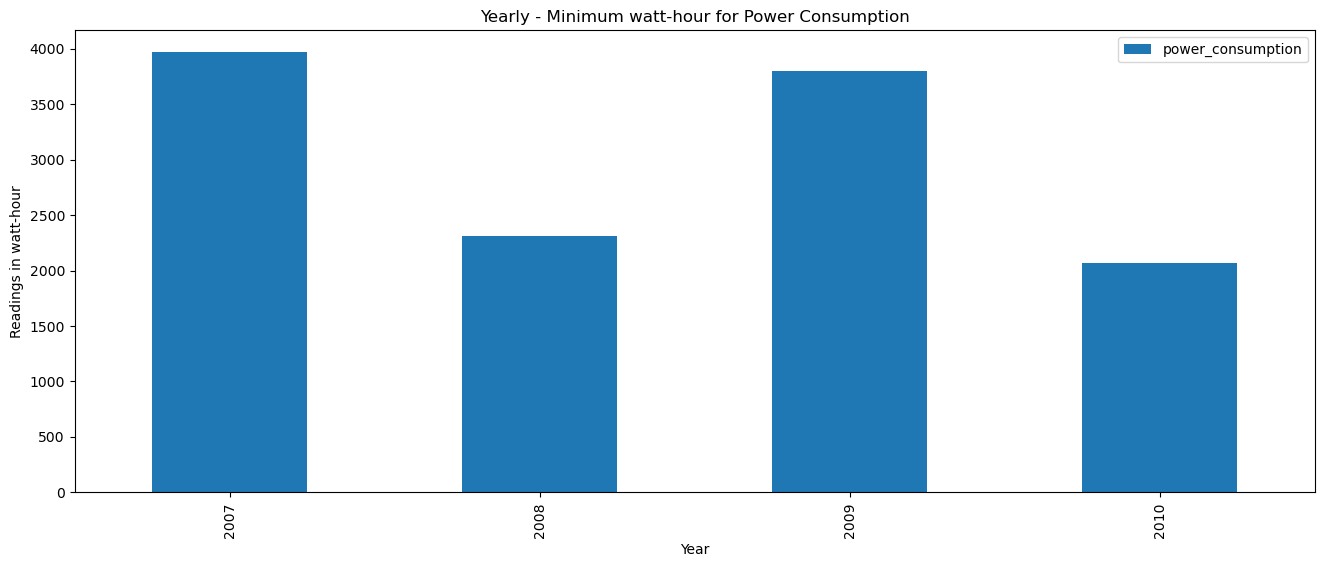

In [24]:
# Yearly - Minimum watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.year).min().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Minimum watt-hour for Power Consumption", figsize=(16,6))

<Axes: title={'center': 'Yearly - Average watt-hour for Power Consumption'}, xlabel='Year', ylabel='Readings in watt-hour'>

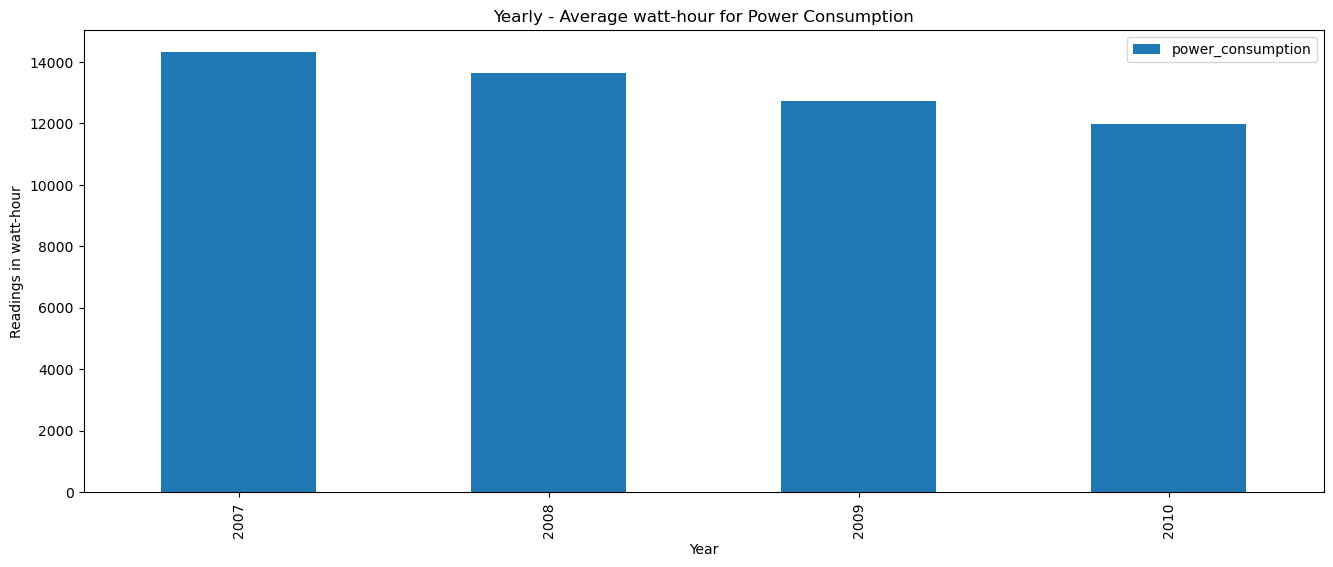

In [25]:
# Yearly - Average watt-hour for Power Consumption
df_power_consumption.groupby(df_power_consumption.index.year).mean().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Average watt-hour for Power Consumption", figsize=(16,6))

- Tổng phạm vi tiêu thụ điện năng là 4000000 - ~ 5500000 watt giờ. tức là 4000 - ~5500 kWH 
- Mức tiêu thụ điện tối đa được thực hiện trong năm 2007 
- Tiêu thụ điện năng tối thiểu được thực hiện vào năm 2010 
- Mức tiêu thụ điện trung bình gần như giống nhau trong tất cả các năm, phạm vi là ~12000 WH đến ~ 14000 WH

In [26]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption,Date,time
dt,,,,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,43.000000,2007-01-01,00:00:00
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,42.533333,2007-01-01,00:01:00
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,42.500000,2007-01-01,00:02:00
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,42.500000,2007-01-01,00:03:00
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,42.566667,2007-01-01,00:04:00


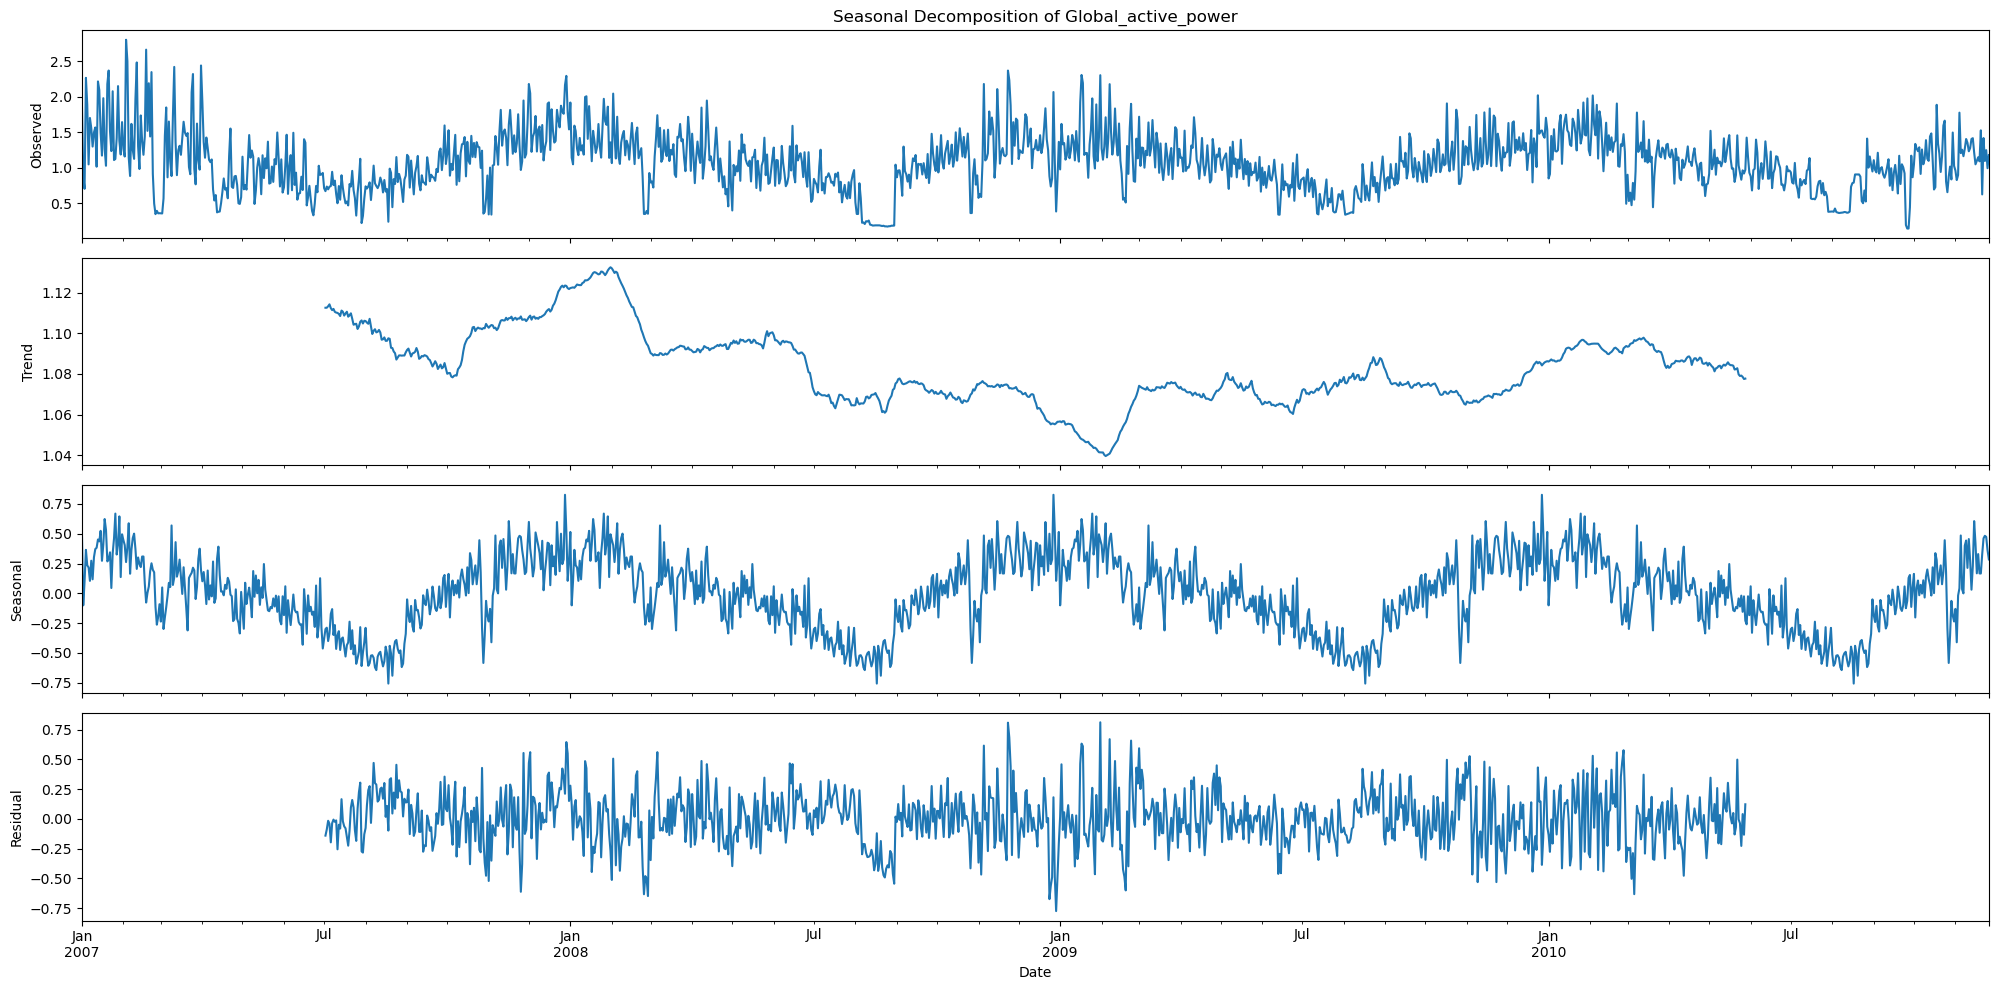

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
ts = df['Global_active_power'].resample('D').mean()
result = seasonal_decompose(ts, model='additive', period=365)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 10), sharex=True)

result.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observed')
ax1.set_title('Seasonal Decomposition of Global_active_power')

result.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Trend')

result.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Seasonal')

result.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [28]:
numeric_cols = df.select_dtypes(include=[float, int]).columns
df_numeric = df[numeric_cols]

df_daily = df_numeric.resample('D').mean()

In [29]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
dt,,,,,,,,
2007-01-01,2749.004,148.166,345785.73,11400.4,0.0,352.0,5880.0,39584.733333
2007-01-02,1269.236,190.342,348399.04,5348.2,0.0,348.0,6562.0,14243.933333
2007-01-03,1014.054,196.728,350722.21,4340.2,0.0,344.0,4765.0,11791.900000
2007-01-04,3259.412,202.302,345240.43,13648.6,1051.0,7597.0,10896.0,34779.533333
2007-01-05,2713.364,173.154,346313.90,11354.6,1483.0,379.0,7602.0,35758.733333


In [30]:
df_daily.to_csv('date_sum_data.csv')